In [1]:
import os, sys
project_root_dir = os.path.join(os.getcwd(),'../..')
if project_root_dir not in sys.path:
    sys.path.append(project_root_dir)

from matplotlib import pyplot as plt
import numpy as np
import torch
import config

from HySpecLab.metrics import rmse, sad

In [2]:
from dataset import Apex
dataset = Apex(config.Apex_PATH)

result_path = os.path.join(config.RESULTS_PATH, 'apex/egu-net/result')
X_true = dataset.A@dataset.endmembers()

In [3]:
dataset.n_col

110

# Endmember Estimation

In [4]:
M_est = np.load(os.path.join(result_path, 'M_Estimation.npy'))

sad_result_vca = sad(torch.tensor(M_est, dtype=torch.float32), dataset.endmembers())

In [5]:
print(sad_result_vca, np.diagonal(sad_result_vca.numpy()).mean())

sad_result = np.diagonal(sad_result_vca.numpy()).mean()
sad_result

tensor([[0.1171, 0.5891, 0.4515, 0.9573],
        [0.6046, 0.1634, 0.8296, 1.1374],
        [0.3635, 0.7710, 0.2027, 1.1616],
        [0.2542, 0.4952, 0.5972, 0.8696]]) 0.33819017


0.33819017

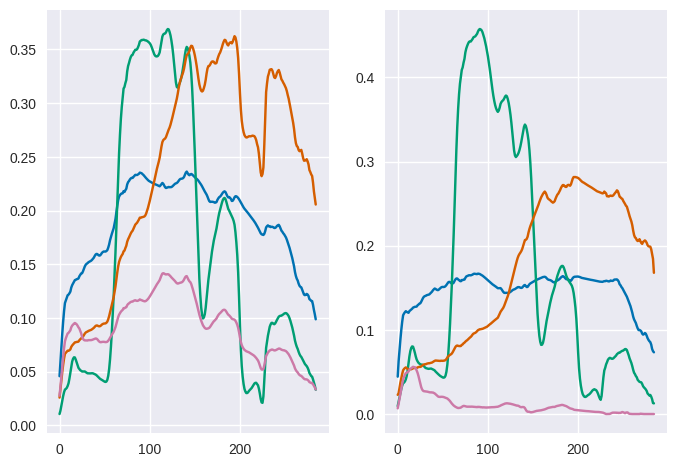

In [8]:
with plt.style.context('seaborn-colorblind'):
    plt.subplot(1,2,1)
    plt.plot(M_est.T)
    plt.subplot(1,2,2)
    plt.plot(dataset.endmembers().T)
    plt.show()


# Reconstruction

In [9]:
rmse_Y = np.zeros(10)
for i in range(10):
    Y_est = torch.tensor(np.load(os.path.join(result_path, 'Y_Estimation/{}.npy'.format(i))), dtype=torch.float32)
    rmse_Y[i] = rmse(X_true, Y_est, dim=None).numpy()

print(rmse_Y.mean(), rmse_Y.std())

0.082345400005579 0.0004344244140697487


# Abundance Estimation

In [10]:
rmse_A = np.zeros(10)
for i in range(10):
    A_est = torch.tensor(np.load(os.path.join(result_path, 'A_Estimation/{}.npy'.format(i))), dtype=torch.float32)
    rmse_A[i] = rmse(dataset.A, A_est, dim=None).numpy()

print(rmse_A.mean(), rmse_A.std())

0.16923068910837175 0.0015925041585602223


# Save Results

In [11]:
import pandas as pd 

df = pd.DataFrame({'RMSE_X':rmse_Y.mean(), 'RMSE_X_std':rmse_Y.std(), 'RMSE_A':rmse_A.mean(), 'RMSE_A_std':rmse_A.std(), 'SAD_M':sad_result}, index=[0])
df.to_csv(os.path.join(result_path, 'metrics.csv'), index=False)

In [13]:
df

,RMSE_X,RMSE_X_std,RMSE_A,RMSE_A_std,SAD_M
0,0.082345,0.000434,0.169231,0.001593,0.33819


# Images

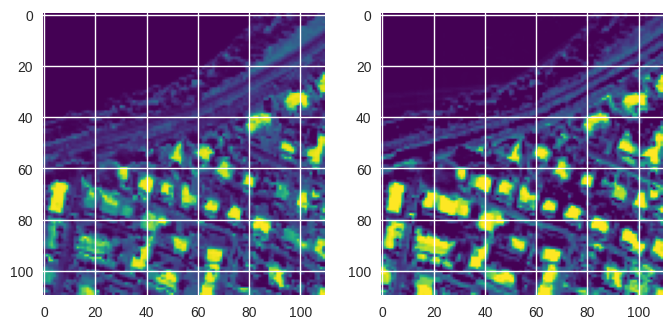

In [12]:
# plt.imshow(dataset.A.numpy().reshape(dataset.n_col, dataset.n_row, -1, order='F'), cmap='jet')
plt.subplot(1, 2, 1)
plt.imshow(A_est.numpy().reshape(dataset.n_col, dataset.n_row, -1, order='F')[..., 2], cmap='viridis')
plt.subplot(1, 2, 2)
plt.imshow(dataset.A.numpy().reshape(dataset.n_col, dataset.n_row, -1, order='F')[..., 2], cmap='viridis')
plt.show()

In [74]:
A_est[:, 3].max()

tensor(0.6720)

In [54]:
dataset.A.max()

tensor(1.)